<a href="https://colab.research.google.com/github/jovelascom/SYS/blob/main/PARCIAL_I_SE%C3%91ALES_%26_SISTEMAS_JOSE_VELASCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregunta 1

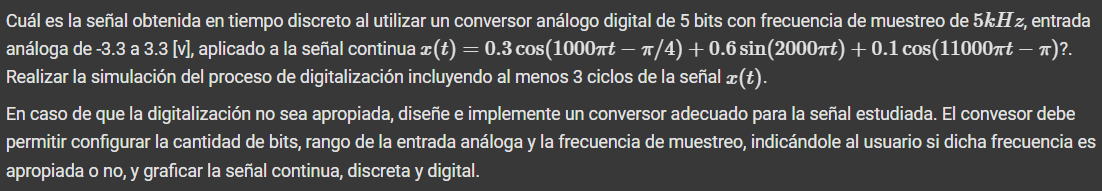

In [158]:
#Se importan las librerias para tratamiento numérico y para graficar señales, numpy y matplotlib.pyplot respectivamente.
import numpy as np
import matplotlib.pyplot as plt

In [159]:
#Se define la función de cero y pendiente para hacer el acondicionamiento de las señales buscando el proceso de discretización. Se utilizará eventualmente en el desarrollo del código.
def my_cero_pendiente (x, y_min, y_max):
  x_min = min(x)
  x_max = max(x)
  m = (y_max - y_min)/(x_max - x_min)
  b = y_min - m*x_min
  yv = m*x+b
  return yv

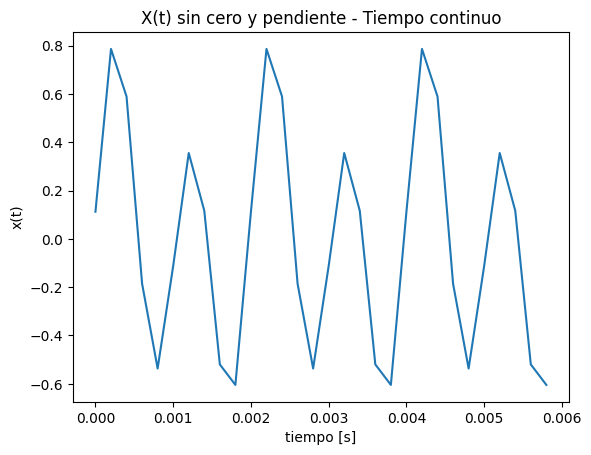

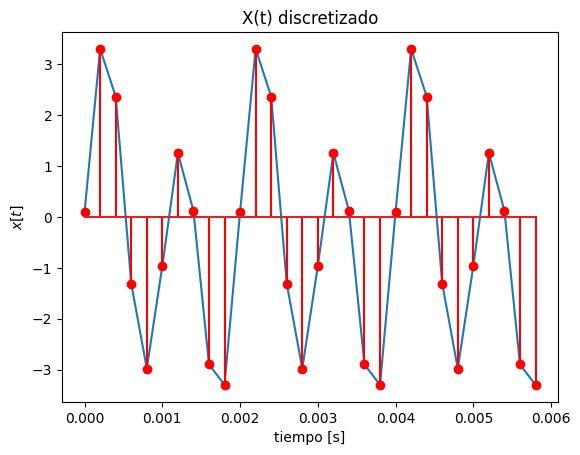

In [160]:
#Se definen los parámetros para cada señal
#Parámetros señal 1
A1 = 0.3 #Amplitud señal 1
w1 = 1000*np.pi #Frecuencia angular señal 1
F1 = w1/(2*np.pi) #Frecuencia Hz señal 1
T1 = 1/F1 #Periodo señal 1
#Parámetros señal 2
A2 = 0.6 #Amplitud señal 2
w2 = 2000*np.pi #Frecuencia angular señal 2
F2 = w2/(2*np.pi) #Frecuencia Hz señal 2
T2 = 1/F2 #Periodo señal 2
#Parámetros señal 3
A3 = 0.1 #Amplitud señal 3
w3 = 11000*np.pi #Frecuencia angular señal 3
F3 = w3/(2*np.pi) #Frecuencia Hz señal 3
T3 = 1/F3 #Periodo señal 3
#Se define los parámetros para la construcción del vector de tiempo
Fo = 60
To = 1/Fo
Fs = 5000 #Frecuencia de muestreo del conversor análogo
Ts = 1/Fs

"FsR = 50*F3 #FsR: Frecuencia de muestreo real. Sería la frecuencia mínima de muestreo para cumplir el teorema de Nyquist. Sin embargo, se multiplica la frecuencia máxima de la combinación lineal de señales por un factor mayor que dos."

#La frecuencia angular más pequeña entre las señales es de 1000π. Para garantizar 2 periodos de la combinación lineal de señales el tiempo final de la simulación debe ser 2 veces la frecuencia definida al principio.

tv = np.arange(0, 3*T1, Ts) #Se arma el vector de tiempo

xv = A1*np.cos(w1*tv-np.pi/4)+A2*np.sin(w2*tv)+A3*np.cos(w3*tv-np.pi) #Se arma el vector de amplitud de la señal, en otras palbras, se define la señal.

xs=my_cero_pendiente(xv,-3.3,3.3) #Se pasa el vector de amplitud de la señal por la función de acondicionamiento creada previamente con el fin de definir una amplitud controlada de la misma.

#Las siguientes estructuras se tornarán repetiitivas a lo largo del código. Se emplean para graficar el comportamiento de las señales en tiempo continuo y en tiempo discreto. Se comentarán estos trozos de código como #GRAFICAS para simplicidad y adicional a lo anterior se especificarán las lineas para graficar en tiempo continuo y en tiempo discreto.

plt.title('X(t) sin cero y pendiente - Tiempo continuo') #Continuo
plt.plot(tv, xv)
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()
print()
print()
plt.title('X(t) discretizado')
plt.plot(tv,xs) #Continuo
plt.stem(tv,xs,'r-') #Discreto
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t]$')
plt.show()



Ya teniendo la función en tiempo continuo y discreto, se pasa a digitalizar la señal.

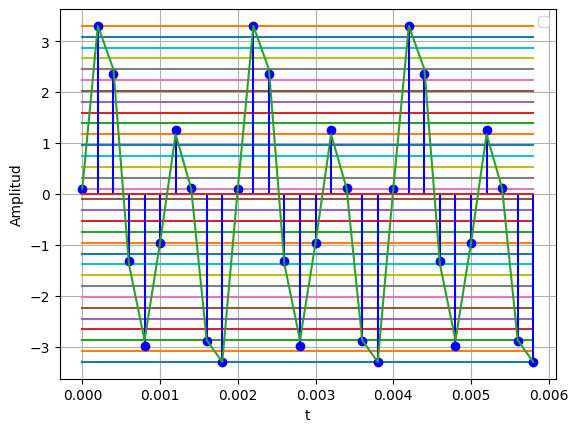

In [161]:
from scipy.spatial.distance import cdist #Se importa la función dcist para el cálculo de distancias entre puntos.

bits = 5 #Se asigna a la variable la cantidad de bits del conversor análogo.

#Se definen los valores dentro de los que estára la señal digitalizada.
r_min = -3.3
r_max = 3.3

xs=my_cero_pendiente(xv,-3.3,3.3) #Se utiliza la misma señal acondicionada para el proceso de digitalización.
k = np.linspace(r_min, r_max, 2**bits) #Se define el vector de cuantización k
h = cdist(xs.reshape(-1, 1), k.reshape(-1, 1)) #A h se le asignan las distancias entre los puntos de la señal acondicionada y los niveles de cuantización definidos en el vector de cuantización.
torta = np.argmin(h, axis=1) #Esta linea define los k's más cercanos a cada valor de xs.

#Se define ahora la función de cuantización.
def cuant (a, b):
  lk = b.shape[0]
  rk =cdist(a.reshape(-1, 1), b.reshape(-1, 1))
  rkmin = np.argmin(rk)
  return b[rkmin]

for i in range (xs.shape[0]):
  if i==0:
    kj = cuant(xs[i], k)
  else:
    kj =np.append(kj, cuant(xs[i], k))
#GRÁFICAS
for o in k:
  plt.plot(tv, o*np.ones(len(tv))) #Digitalización
plt.stem(tv,xs,'b.') #Discreto
plt.plot(tv, kj) #Continuo
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

Comparando las velocidades angulares de cada componente de la combinación lineal de las señales, se tiene que:

$F_1 = \frac{\omega_1 \pi}{2\pi} = 500 \, \text{[Hz]}$

$F_2 = \frac{\omega_2 \pi}{2\pi} = 1000 \, \text{[Hz]}$

$F_3 = \frac{\omega_3 \pi}{2\pi} = 5500 \, \text{[Hz]}$

Como puede evidenciarse, la frecuencia de la señal 3, correspondiente a $0.1\cos(11000\pi - \pi)$, es la frecuencia máxima de la combinación lineal de señales propuestas.

El conversor análogo plantea una frecuencia de muestreo $F_s = 5000 \, \text{[Hz]}$. Esta frecuencia de muestreo viola el teorema de Nyquist, que establece que la frecuencia de muestreo debe ser al menos dos veces la frecuencia más alta de la señal.

Por lo anterior, se plantea un conversor análogo bajo las condiciones mostradas en las siguientes líneas de código.



In [162]:
#Fs1 = 2*F3 Esta expresión sería el caso mínimo para cumplir con el teorema de Nyquist
Fs1 = 50*F3
Ts1 = 1/Fs1

#Durante la discretización de la señal, se logró evidenciar que no era posible visualizar al tiempo la correción de la señal y las muestras discretizadas. Para darle solución se plantea lo siguiente:

#Se genera el vector de tiempo tv1 con la condición de Nyquist para corregir el aliasing en la señal.
tv1 = np.arange(0, 3*T1, Ts1)
#Se genera el vector de amplitud de la señal.
xv1 = A1*np.cos(w1*tv1+np.pi/4) + A2*np.sin(w2*tv1) + A3*np.cos(w3*tv1-np.pi)
#Se hace el proceso de acondicionamiento de la señal.
xs1=my_cero_pendiente(xv1,-3.3,3.3)

#Se genera un nuevo vector de tiempo para el la discretización de la señal. Esta vez con np.linspace para definir y modificar a voluntad el número de muestras.
tv11 = np.linspace(0, 3*T1, 100)
#Se genera el vector de amplitud de la señal.
xv11 = A1*np.cos(w1*tv11+np.pi/4) + A2*np.sin(w2*tv11) + A3*np.cos(w3*tv11-np.pi)
#Se hace el acondicionamiento de la señal.
xs11=my_cero_pendiente(xv11,-3.3,3.3)


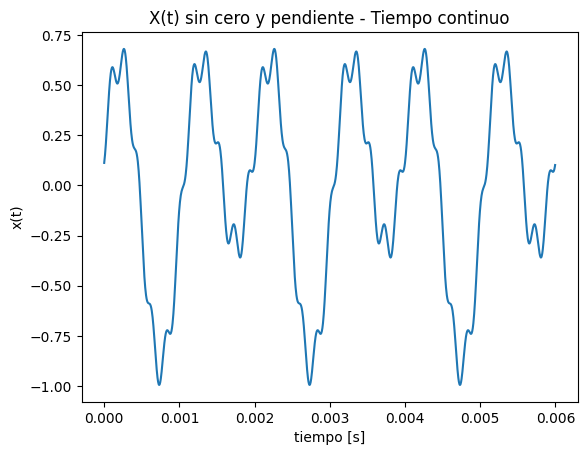

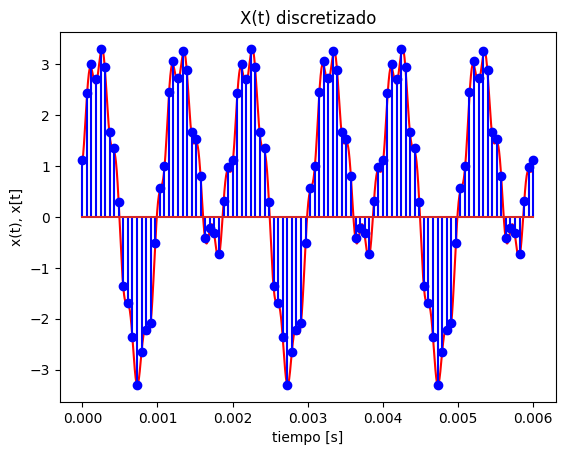

In [163]:
#GRÁFICAS
plt.title('X(t) sin cero y pendiente - Tiempo continuo')
plt.plot(tv1, xv1) #Gráfica en tiempo continuo para la señal con la condición de Nyquist
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()
print()
print()
plt.title('X(t) discretizado')
plt.plot(tv1,xs1,"r") #Se grafica nuevamente la señal en continuo para tenela de referencia y contrastar con la discretización.
plt.stem(tv11,xs11,'b') #Se grafican las muestras discretas de la señal acondicionada.
plt.xlabel('tiempo [s]')
plt.ylabel('x(t), x[t]')
plt.show()

Con esto, se logra tener una visualización adecuada de la señal, tanto en tiempo continuo como en tiempo discreto.

A continuación, se hace el proceso de digitalización de la señal.


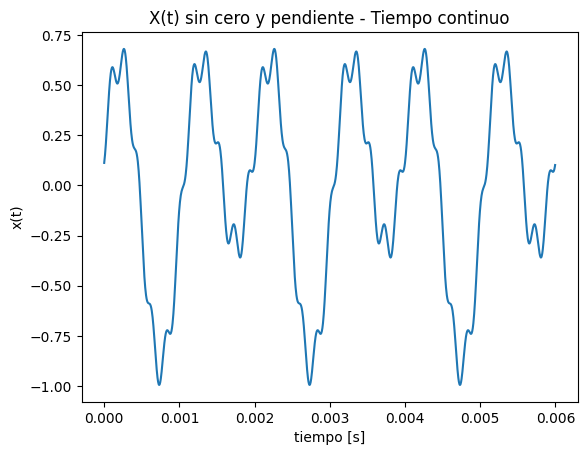

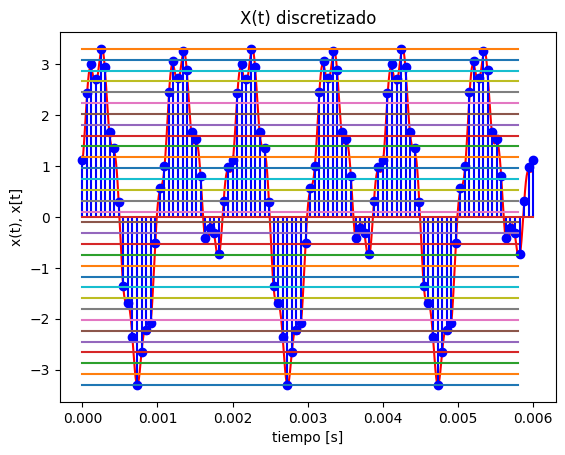

In [164]:
from scipy.spatial.distance import cdist #Se importa la función dcist para el cálculo de distancias entre puntos.

bits = 5 #Se asigna a la variable la cantidad de bits del conversor análogo.

#Se definen los valores dentro de los que estára la señal digitalizada.
r_min = -3.3
r_max = 3.3

xs=my_cero_pendiente(xv,-3.3,3.3) #Se utiliza la misma señal acondicionada para el proceso de digitalización.
k = np.linspace(r_min, r_max, 2**bits) #Se define el vector de cuantización k
h = cdist(xs.reshape(-1, 1), k.reshape(-1, 1)) #A h se le asignan las distancias entre los puntos de la señal acondicionada y los niveles de cuantización definidos en el vector de cuantización.
torta = np.argmin(h, axis=1) #Esta linea define los k's más cercanos a cada valor de xs.

#Se define ahora la función de cuantización.
def cuant (a, b):
  lk = b.shape[0]
  rk =cdist(a.reshape(-1, 1), b.reshape(-1, 1))
  rkmin = np.argmin(rk)
  return b[rkmin]

for i in range (xs.shape[0]):
  if i==0:
    kj = cuant(xs[i], k)
  else:
    kj =np.append(kj, cuant(xs[i], k))

#GRÁFICAS
plt.title('X(t) sin cero y pendiente - Tiempo continuo')
plt.plot(tv1, xv1) #Gráfica en tiempo continuo para la señal con la condición de Nyquist
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()
print()
print()
plt.title('X(t) discretizado')
plt.plot(tv1,xs1,"r") #Se grafica nuevamente la señal en continuo para tenela de referencia y contrastar con la discretización.
plt.stem(tv11,xs11,'b') #Se grafican las muestras discretas de la señal acondicionada.
for o in k:
  plt.plot(tv, o*np.ones(len(tv))) #Digitalización
plt.xlabel('tiempo [s]')
plt.ylabel('x(t), x[t]')
plt.show()


Pregunta 2

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

x[n]=sin[100πn]+sin[600πn]

In [165]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-06 04:26:22--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.113, 142.251.2.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-06 04:26:22--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s      

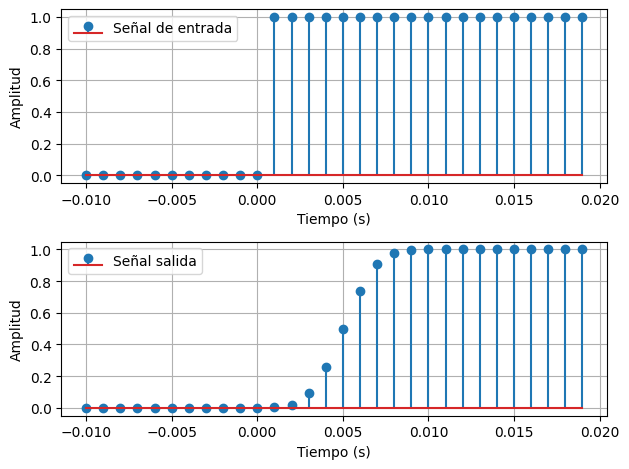

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt
from sympy.functions.special.delta_functions import DiracDelta

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

#Para probar que la señal sea invariante en el tiempo debe cumplir que $x(t)->y(t) = x(t-t0) -> y(t-t0)$

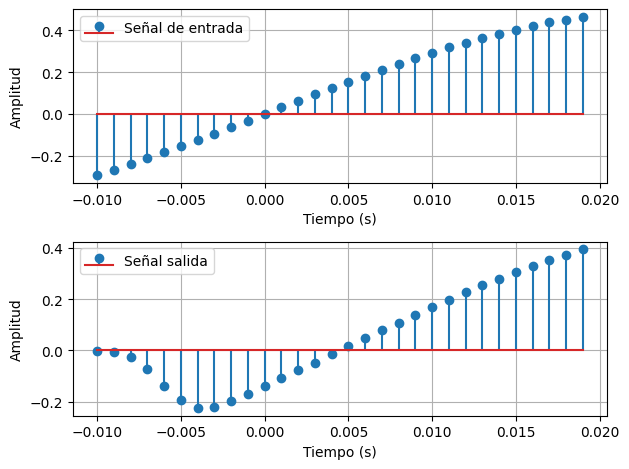

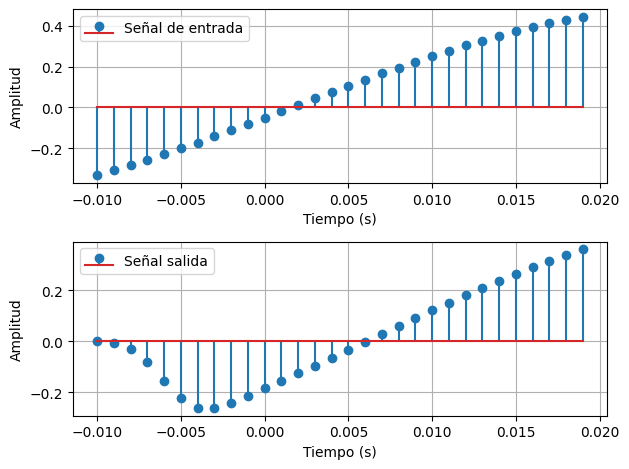

In [167]:
#Se propone en primera instancia un ejemplo de simulación para las condiciones de linealidad e invarianza en el tiempo.

#Se define una señal senoidal como ejemplo.
signal_1 = 0.5*np.sin(20*np.pi*t)
y_1 = my_system.predict(signal_1)
#Se utiliza la misma señal con un desplazamineto en el tiempo para confirmar la primera condición de lo SLITS que consiste en que para la misma entrada x(t), en un intante de tiempo t y en un instante de tiempo to, la naturaleza de la señal en términos de sus propiedades son las mismas.
signal_2 = 0.5*np.sin(20*np.pi*t-0.1)
y_2 = my_system.predict(signal_2)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_1, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_1, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()
print()
print()
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_2, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_2, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Como se puede evidenciar en las gráficas anteriores, el sistema cumple con la primera condición, Invarianza en el tiempo. Las propiedades fundamentales de la señal no se alteran, simplemente se evidencia un desplazamiento en el tiempo.


##Para verificar que sea lineal debe cumplir que $x(t) = \alpha_1 X_1(t)±\alpha_2 X_2(t) $

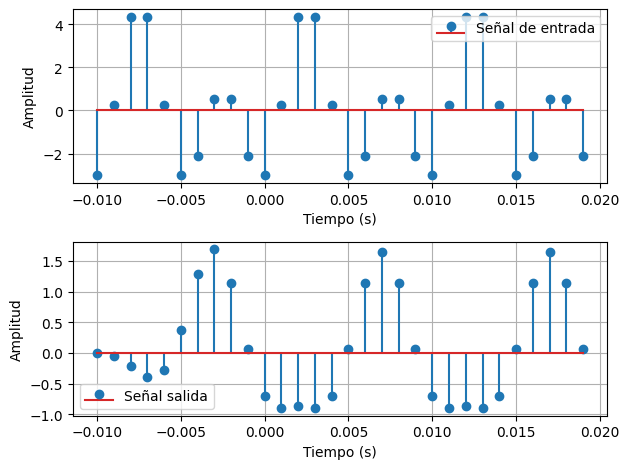

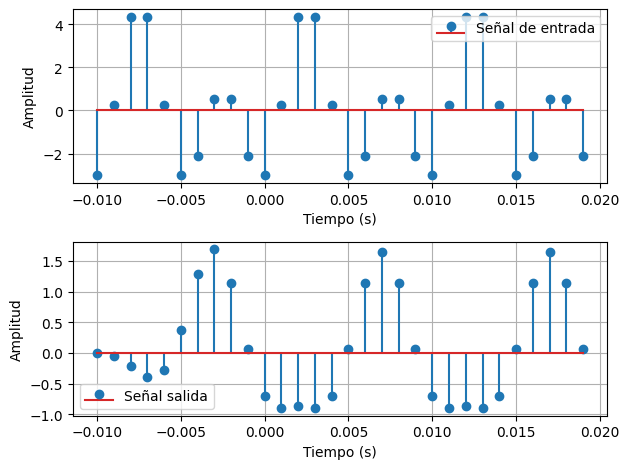

In [168]:
#Se plantea nuevamente una señal compuesta que permita verificar la segunda condición de los SLITS, linealidad.

#Definición de la señal de prueba completa.
signal_3 =  (2*np.sin(w1*tv))-(3*np.cos(w2*tv))
y_3 = my_system.predict(signal_3)

#Definición de la primera parte de la señal.
signal_3_1=(2*np.sin(w1*tv))
y_4 = my_system.predict(signal_3_1) #Respuesta señal 1

#Definición de la segunda parte de la señal.
signal_3_2=-(3*np.cos(w2*tv))
y_5 = my_system.predict(signal_3_2) #Respuesta señal 2

#Combinación de cada una de las respuestas de las señales.
y_6 = y_4 + y_5

#Visualización de las señales.
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_3, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_3, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()
print()
print()
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_3_1+signal_3_2, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_6, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Para que un sistema sea lineal, tiene que cumplir con las condiciones de aditividad (suma de las respuestas individuales de cada trozo de la combinación por separado) y homogeneidad (la multiplicación de la entrada por un escalar implica que la respuesta a esa entrada estará multiplicada por el mismo escalar). Como es posible evidenciar en las gráficas de la sección anterior, esto se cumple, por lo cual, el sistema es lineal.

Con las pruebas realizadas para las condiciones de linealidad y e invarianza en el tiempo, es posible concluir que el sistema de la caja negra planteado en el problema, es un sistema LINEAL E INVARIANTE EN EL TIEMPO.

Consecuentemente, se procede con la respuesta al impulso del sistema ante la entrada planteada.

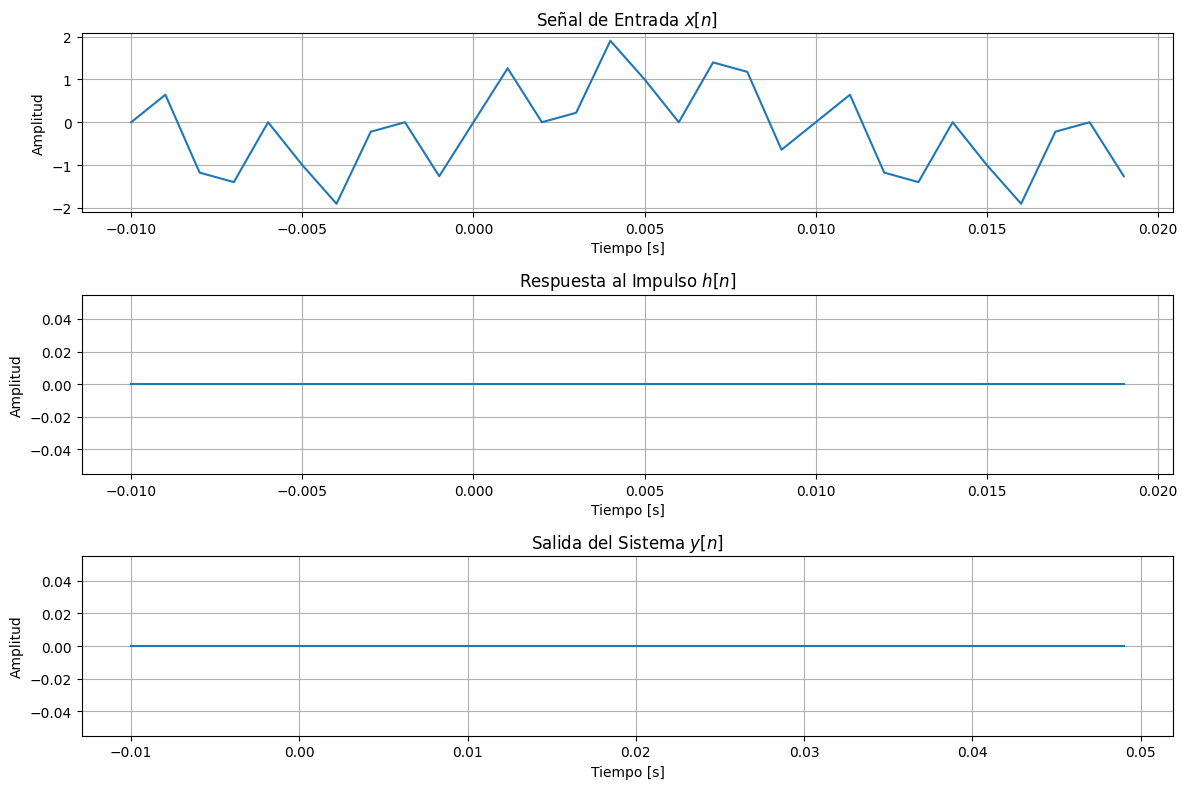

In [169]:
#Se crea un vector de tiempo
t = np.arange(-0.01, 0.02, 1/fs)

#Se crea una señal impulso que se activa en 0.001 y que toma valor de 0 para cualquier otro valor de t
impulso = np.zeros_like(t)
impulso[np.where(t == 0.001)] = 1

#Se pasa el impulso a través del sistema definido previamente, sistema SLIT
y_impulso = my_system.predict(impulso)

#Se define la señal planteada como entrada para el sistema.
x_in = np.sin(100 * np.pi * t) + np.sin(600 * np.pi * t)

#Se calcula la salida del sistema haciendo la convolución entre la respuesta al impulso del sistema y la señal de entrada. Se deivide entre la frecuencia de muestreo para obtener una escala correcta de la gráfica.
x_out = np.convolve(x_in, y_impulso, mode='full') / fs

#Se ajusta el eje de tiempo para la salida.
t_out = np.linspace(t[0], t[0] + len(x_out) / fs, len(x_out))

#Graficar resultados
plt.figure(figsize=(12, 8))

#Graficar señal de entrada
plt.subplot(3, 1, 1)
plt.plot(t, x_in)
plt.title("Señal de Entrada $x[n]$")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()

#Graficar respuesta al impulso
plt.subplot(3, 1, 2)
plt.plot(t, y_impulso)
plt.title("Respuesta al Impulso $h[n]$")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()

#Graficar señal de salida
plt.subplot(3, 1, 3)
plt.plot(t_out, x_out)
plt.title("Salida del Sistema $y[n]$")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()

plt.tight_layout()
plt.show()

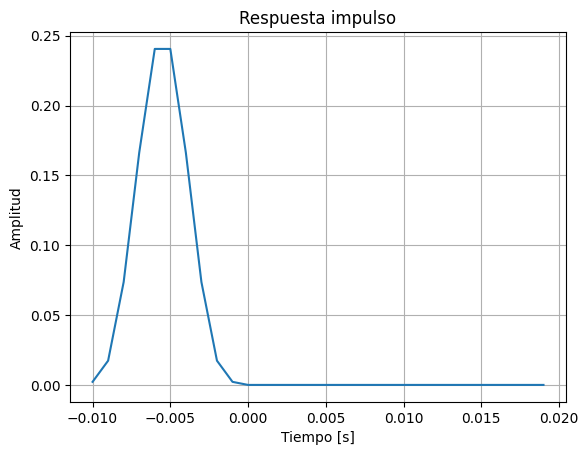

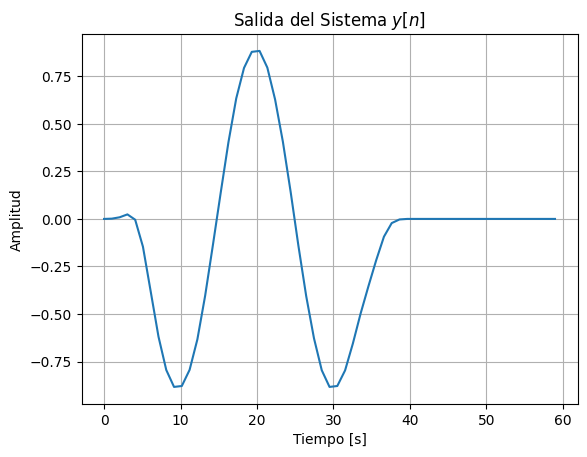

In [170]:
#Se genera un vector para la señal impulso con el mismo tamaño que se definió en la celda de código anterior el vector t.
impulso=np.zeros(len(t))
#Se asigna el valor de la señal impulso a la primera posición del vector de la señal.
impulso[0]=1
#Se pasa la señal impulso por el sistema para calcular la respuesta de este ante la excitación.
y_impulso=my_system.predict(impulso)
#Se define la señal de entrada.
x_in=np.sin(100*np.pi*t)+np.sin(600*np.pi*t)
#Y ahora se calcula la respuesta del sistema utilizando la convolución entre la señal de entrada y la respuesta al impulso del sistema calculada atrás.
xc=np.convolve(x_in,y_impulso)
#Se define un nuevo vector de tiempo para ajustar la salida a la duración de la respuesta y evitar las evaluaciones sobre cero de la convolución, es decir, un tipo de escaner falso.
t_out=np.linspace(t[0],t[0]+len(xc),len(xc))

#GRÁFICAS
#Primero se muestra la respuesta al impulso del sistema.
plt.plot(t,y_impulso)
plt.title("Respuesta impulso")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()
print()
print()
#Posteriormente, una vez aplicada la convolución, se grafica la señal de salida del sistema ante la entrada planteada x[n]
plt.plot(t_out,xc)
plt.title("Salida del Sistema $y[n]$")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()